<a href="https://colab.research.google.com/github/FabinDr/Analise-dos-salarios-em-dataScience/blob/main/imersaoDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv')

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


ANALISANDO SALÁRIO DA ÁREA DE TI

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


Trazendo a dimensão do dataframe

In [ ]:
df.shape

(133349, 11)

In [ ]:
linhas, colunas = df.shape

print('Esse dataframe possue:',linhas ,'linhas e' , colunas, 'colunas')

Esse dataframe possue: 133349 linhas e 11 colunas


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# Mapeamento dos nomes das colunas em inglês para português
mapeamento_colunas = {
    'work_year': 'ano_trabalho',
    'experience_level': 'nivel_experiencia',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'localizacao_empresa',
    'company_size': 'porte_empresa'
}

# Renomear as colunas
df.rename(columns=mapeamento_colunas, inplace=True)

# Exibir as colunas renomeadas para verificar
print(df.columns)

Index(['ano_trabalho', 'nivel_experiencia', 'contrato', 'cargo', 'salario',
       'moeda', 'usd', 'residencia', 'remoto', 'localizacao_empresa',
       'porte_empresa'],
      dtype='object')


In [ ]:
df['nivel_experiencia'].value_counts()

,count
nivel_experiencia,
SE,77241
MI,40465
EN,12443
EX,3200


In [ ]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [ ]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


0 - PRESENCIAL
100 - REMOTO
50 - HÍBRIDO

In [ ]:
df['porte_empresa'].value_counts()

,count
porte_empresa,
M,129561
L,3574
S,214


In [ ]:
# Mapeamento dos níveis de experiência em inglês para português
nivel_experiencia = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

# Traduzir as categorias na coluna 'nivel_experiencia'
df['nivel_experiencia'] = df['nivel_experiencia'].replace(nivel_experiencia)

# Exibir as contagens dos níveis de experiência traduzidos
df['nivel_experiencia'].value_counts()

,count
nivel_experiencia,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [ ]:
# Mapeamento dos tipos de contrato em inglês para português
mapeamento_contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Tempo Parcial',
    'FL': 'Freelancer'
}

# Traduzir as categorias na coluna 'contrato'
df['contrato'] = df['contrato'].replace(mapeamento_contrato)

# Exibir as contagens dos tipos de contrato traduzidos
df['contrato'].value_counts()

,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelancer,16


In [ ]:
# Mapeamento dos portes de empresa em inglês para português
mapeamento_porte_empresa = {
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
}

# Traduzir as categorias na coluna 'porte_empresa'
df['porte_empresa'] = df['porte_empresa'].replace(mapeamento_porte_empresa)

# Exibir as contagens dos portes de empresa traduzidos
df['porte_empresa'].value_counts()

,count
porte_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [ ]:
# Mapeamento dos valores da coluna 'remoto' para português
mapeamento_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

# Traduzir os valores na coluna 'remoto'
df['remoto'] = df['remoto'].replace(mapeamento_remoto)

# Exibir as contagens dos valores traduzidos
df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [ ]:
df.head()

,ano_trabalho,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao_empresa,porte_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
df.describe(include="object")

,nivel_experiencia,contrato,cargo,moeda,residencia,remoto,localizacao_empresa,porte_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [ ]:
df.describe()

,ano_trabalho,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# Tratamento de dados

Preparação e limpeza dos dados

Primeiro, vamos analisar informações que estão nulas

In [ ]:
df.isnull()

,ano_trabalho,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao_empresa,porte_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
ano_trabalho,10
nivel_experiencia,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
localizacao_empresa,0


In [ ]:
df['ano_trabalho'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

Trazendo as linhas nulas

In [ ]:
df[df.isnull().any(axis=1)]

,ano_trabalho,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao_empresa,porte_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [ ]:
# incluindo dados em um df para aprendizagem

In [ ]:
import numpy as np

In [ ]:
df_salario = pd.DataFrame({
   'Nome':["Ana", "Bruno", "Carlos", "Daniele", "Fabio"],
   'Salario' :[ 4000, np.nan, 5000, np.nan, 100000]
})

df_salario['salario_media'] = df_salario['Salario'].fillna(df_salario['Salario'].mean().round(2))
df_salario['salario_mediana'] = df_salario['Salario'].fillna(df_salario['Salario'].median())


display(df_salario)

,Nome,Salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Fabio,100000.0,100000.00,100000.0


Excluindo os dados nulos

In [ ]:
df_limpo = df.dropna()

In [ ]:
df_limpo.isnull().sum()

,0
ano_trabalho,0
nivel_experiencia,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
localizacao_empresa,0


In [ ]:
df_limpo.head()

,ano_trabalho,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao_empresa,porte_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ano_trabalho         133339 non-null  float64
 1   nivel_experiencia    133339 non-null  object 
 2   contrato             133339 non-null  object 
 3   cargo                133339 non-null  object 
 4   salario              133339 non-null  int64  
 5   moeda                133339 non-null  object 
 6   usd                  133339 non-null  int64  
 7   residencia           133339 non-null  object 
 8   remoto               133339 non-null  object 
 9   localizacao_empresa  133339 non-null  object 
 10  porte_empresa        133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


Convertendo o tipo de dado de ano_trabalho

In [ ]:
df_limpo = df_limpo.assign(ano_trabalho = df_limpo["ano_trabalho"].astype("int64"))

In [ ]:
df_limpo.head()

,ano_trabalho,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao_empresa,porte_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


Visualização de dados - criando gráficos

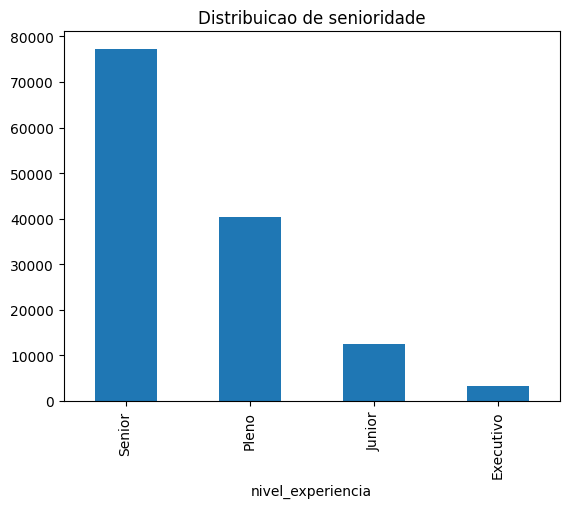

In [ ]:
df_limpo['nivel_experiencia'].value_counts().plot(kind='bar', title='Distribuicao de senioridade');

Matplotlib e searbon

In [ ]:
import seaborn as sns

Podemos incrementar os gráficos com estatística

Vamos calcular o salário médio de acordo com os níveis de experiência

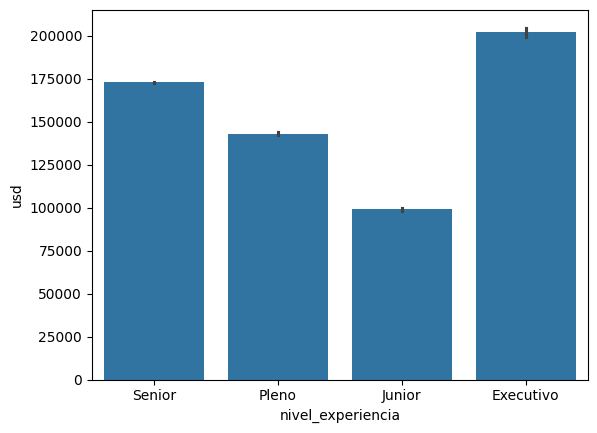

In [ ]:
sns.barplot(
data = df_limpo, x='nivel_experiencia',y='usd');

In [ ]:
import matplotlib.pyplot as plt

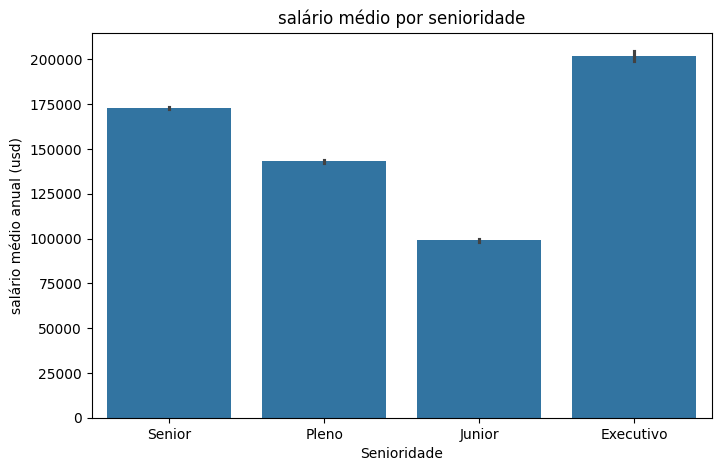

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data = df_limpo, x='nivel_experiencia',y='usd')
plt.title("salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("salário médio anual (usd)")
plt.show()

In [ ]:
ordem = df_limpo.groupby('nivel_experiencia')['usd'].mean().sort_values(ascending= False).index
ordem

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='nivel_experiencia')

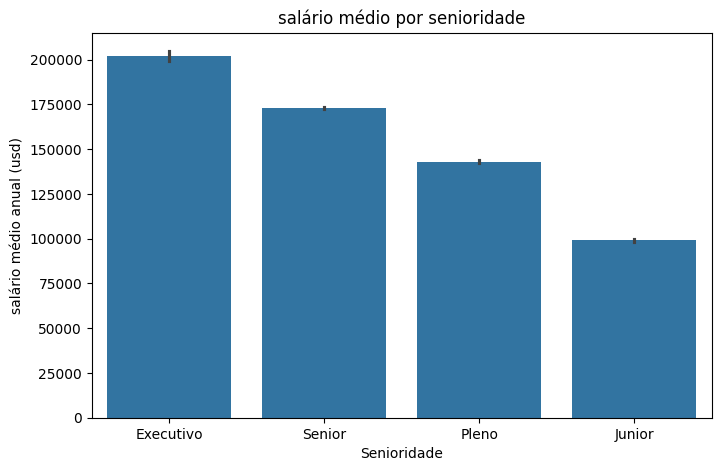

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data = df_limpo, x='nivel_experiencia',y='usd', order =ordem)
plt.title("salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("salário médio anual (usd)")
plt.show()

Analisando a distribuição salarial

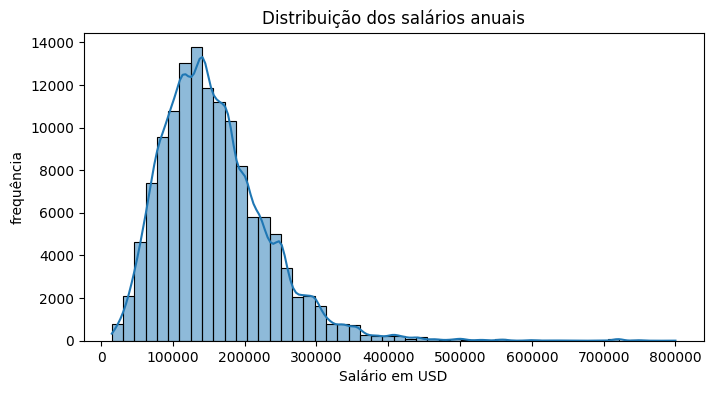

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df_limpo['usd'], bins = 50, kde=True)
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário em USD')
plt.ylabel('frequência')
plt.show()

Vendo com mais detalhes os dados

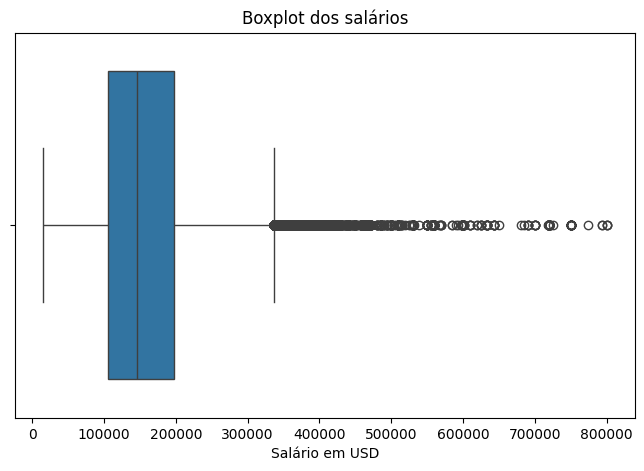

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxplot dos salários')
plt.xlabel('Salário em USD')
plt.show()

Analisando os salários médios por nível

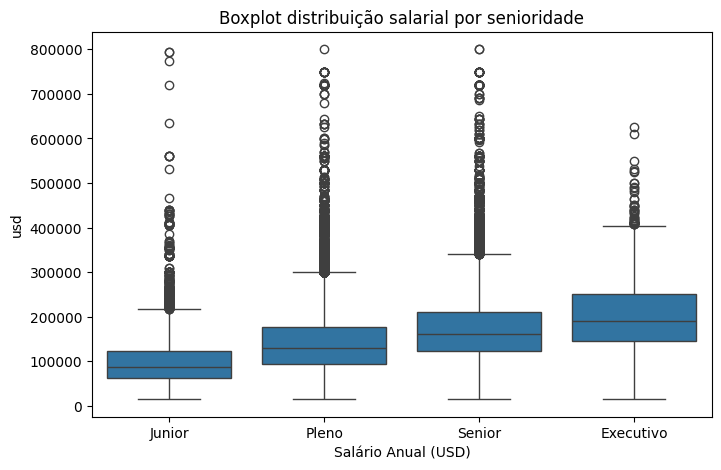

In [ ]:
ordem_senioridade = ['Junior','Pleno','Senior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='nivel_experiencia', y='usd', data= df_limpo, order = ordem_senioridade)
plt.title('Boxplot distribuição salarial por senioridade')
plt.xlabel('Salário Anual (USD)')
plt.show()

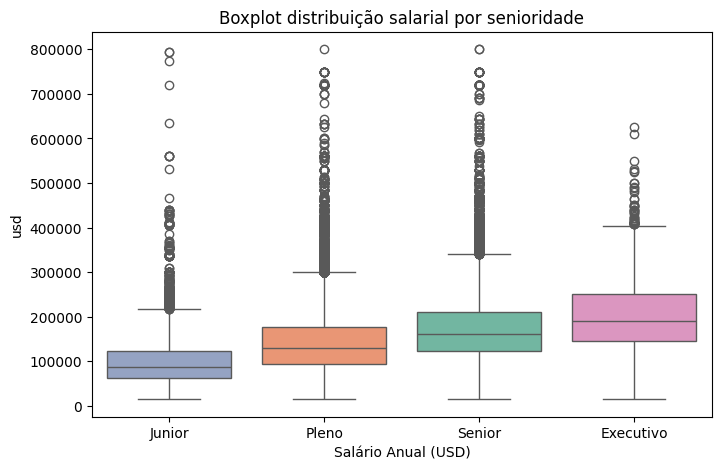

In [ ]:
ordem_senioridade = ['Junior','Pleno','Senior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='nivel_experiencia', y='usd', data= df_limpo, order = ordem_senioridade, palette='Set2', hue='nivel_experiencia')
plt.title('Boxplot distribuição salarial por senioridade')
plt.xlabel('Salário Anual (USD)')
plt.show()

Gráficos interativos
plotly

In [ ]:
import plotly.express as px

In [ ]:
fig = px.bar(df_limpo.groupby('nivel_experiencia')['usd'].mean().sort_values(ascending=False).reset_index(),
             x='nivel_experiencia',
             y='usd',
             title='Salário Médio por Nível de Experiência',
             labels={'nivel_experiencia': 'Nível de Experiência', 'usd': 'Salário Médio (USD)'})
fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
names= 'tipo_trabalho',
values= 'quantidade',
title='Proporção dos tipos de trabalho'

)
fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
names= 'tipo_trabalho',
values= 'quantidade',
title='Proporção dos tipos de trabalho',
hole=0.5

)

fig.update_traces(textinfo='percent+label')
fig.show()

Fazer o gráfico da analise por país papa o cargo de data science (salário médio por país para o cargo de data science)

Criando uma visualização em forma de gráfico


In [ ]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 14.2 MB/s eta 0:00:00


In [ ]:
import pycountry

In [ ]:
# Função para converter ISO-2 para ISO-3

def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except AttributeError:
        return None


#Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

#Calculando média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_salarial_por_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

#Gerar o mapa

fig = px.choropleth(media_salarial_por_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Média Salarial de Cientista de Dados por País',
                    labels={'usd': 'Média Salarial (USD)','residencia_iso3': 'País'}

                    )

fig.show()


In [ ]:
df_limpo.head()

,ano_trabalho,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao_empresa,porte_empresa,residencia_iso3
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio,USA
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio,AUS
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio,USA


In [ ]:
df_limpo.to_csv("dataframeFinal.csv", index=False)

# Baixando
from google.colab import files
files.download("dataframeFinal.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>